# Notebook 3 - Basic Plotting

Producing informative visuals for your data is an important part of data analysis. Here, we introduce matplotlib which is the de facto standard plotting library used in Python. We tend to interact with matplotlib through its `pyplot` module, which is normally imported like so:

In [1]:
import matplotlib.pyplot as plt

## My first plot

Let's see how easy it is to plot with pyplot by drawing a line graph of some randomly-generated data.

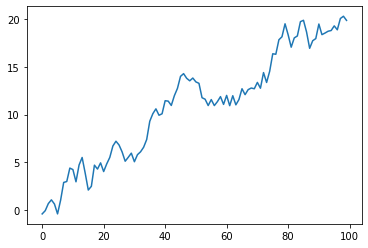

In [2]:
import numpy as np
data = np.random.randn(100).cumsum() #Create some random data. Return the cumulative sum of the elements along a given axis.
plt.plot(data) #Plot the data
plt.show() #Show the plot

That's not so hard! The `plt.plot` function in general can take sequences of numerical values of the same length and plot them against each other. If we give just one array, `plt.plot` will plot the elements of the array against their index.

We can also give `plt.plot` what's called a format string, which controls the style of the line we plot. In the example below, the string `g.:` specifies we want our plot to be green (`g`), with data marked by a small dot (`.`), and joined to one another by a dotted line (`:`). For a full list of colours, point markers, and line styles, see the documentation for `plt.plot` (remember you can run `plt.plot?` or sude `Shift + TAB` to access this).

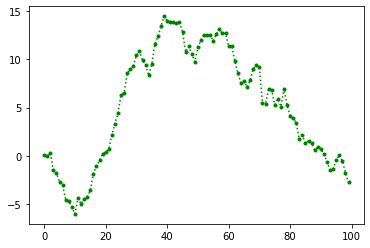

In [3]:
plt.plot(data, 'g.:')
plt.show()

The `plt.plot` method is called an artist method, because it draws something, and it does so in a articular way (it draws line plots). There are many other artist methods available to us in the `pyplot` module. Here are some of the most useful artist methods:

|Artist|Style|
|---|---|
|plot|line plots|
|bar|bar charts (vertica)|
|barh|horizontal bar charts|
|boxplot|boxplots|
|hist|histograms|
|loglog|log-log scaled plots|
|matshow|heat map of a matrix|
|pie|pie charts|
|quiver|2-D vector fields|
|scatter|scatter diagrams|
|violin|violin plots|

Each artist method can be accessed by prefixing it with `plt`. You can find out more about each method using the `pyplot` documentation available within Jupyter notebooks or in more detail at [the matplotlib documentation site](https://matplotlib.org/index.html). By exploring this documentation you may find even more useful artist methods for you to use!

### Exercise 1

Use Numpy to generate 2 different sequences of random numbers of the same length. Then plot these against one another as a scatter diagram.

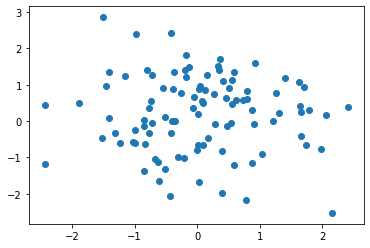

In [5]:
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x,y)
plt.show()

## Annotation and Customisation

Annotating and customising plots is just as easy as creating them. In the example below, we import some categorical data from a file, plot it, and add axis labels and a title.

In [8]:
#Read the data from a csv file
rawdata = np.genfromtxt("./data/headcount.csv", dtype=np.str, delimiter=",") # read data into an np array
print(rawdata)

[['College/Support Group' ' Staff Count']
 ['CAHSS' ' 3822']
 ['CMVM' ' 3257']
 ['CSE' ' 3534']
 ['CSG' ' 2366']
 ['ISG' ' 700']
 ['USG' ' 1201']]


In [9]:
header = rawdata[0] # Separate out column headers
groups = rawdata[1:, 0] # Separate first column
counts = np.asarray(rawdata[1:, 1], dtype=np.int) # Separate second column

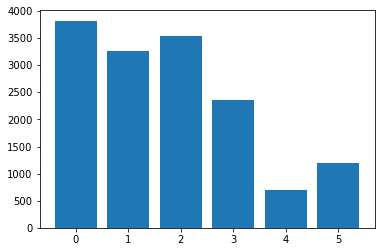

In [12]:
#Plot a bar chart of staff numbers
plt.bar(np.arange(len(counts)), counts) # Create bar chart
plt.show()

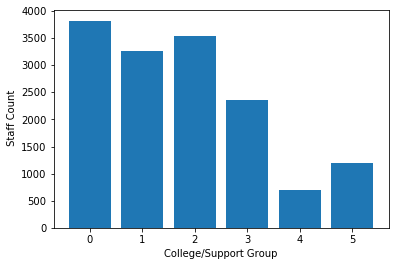

In [13]:
# add axis labels now 
plt.bar(np.arange(len(counts)), counts) # Create bar chart
plt.xlabel(header[0]) # Set x axis label
plt.ylabel(header[1]) # Set y axis label
plt.show()

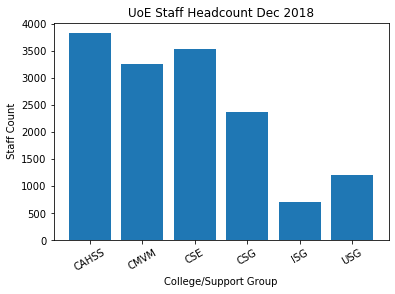

In [14]:
# add axis labels now 
plt.bar(np.arange(len(counts)), counts) # Create bar chart
plt.xlabel(header[0]) # Set x axis label
plt.ylabel(header[1]) # Set y axis label

plt.xticks(np.arange(len(counts)), groups, rotation=30) # Set labels for x axis ticks
plt.title("UoE Staff Headcount Dec 2018") # Set title
plt.show()

Let's break that sequence of plotting commands down some more.
- The method `plt.bar` takes an array of positions for which to centre the bars, and an array of the same length giving the heights of the bars. In general, if we have n bars, the numbers 1, 2, ..., n are a good way of centering the bars. We specified that here by passing the array `np.arange(len(counts))`.
- The methods `plt.xlabel` and `plt.ylabel` set labels for the x and y axes respectively. We had stored these in the array `header`, which contained the header row in our csv file.
- The method `plt.xticks` sets where the ticks should be placed on the x axis. We have told it to put them at the centre of each bar, and have given it an array of strings to be used as labels (the default is to use numerical values), as well as an optional rotation parameter.
- The method `plt.title` gives our figure a title.
- Finally, `plt.show` displays the figure for us!

We can also add a legend to our figures if, for instance, they contain multiple plots. Here's an example, using sin and cos functions.

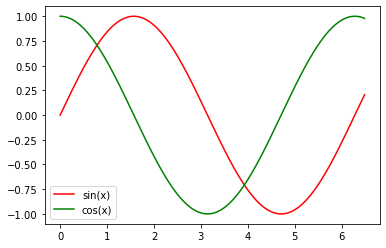

In [15]:
x = np.arange(0, 6.5, 0.01)
plt.plot(x, np.sin(x), 'r', label= "sin(x)")
plt.plot(x, np.cos(x), 'g', label= "cos(x)")
plt.legend(loc='best')
plt.show()

We were able to draw multiple lines on the same figure by multiple successive calls to `plt.plot`. Then `plt.legend` adds a legend to the figure. The simplest way to sue this is to give a parameter `label` each time we call an artist method, and then `plt.legend` will work out how things should be labelled. The optional `loc` parameter specifies where the legend will be placed (defaults to top right).

### Exercise 2

The following code reads in quarterly data on marriages and civil partnerships in Scotland between 2008 and 2018 (obtained from [NRS](https://www.nrscotland.gov.uk/statistics-and-data)).

In [16]:
# Read data, skipping header
raw = np.genfromtxt("data/marriage_data.csv", delimiter=",", skip_header=1)

# Separate data (columns known in advance)
opp_sex_marriage = raw[:, 0] # Opposite Sex Mrriages
same_sex_marriage = raw[:, 1] # Same Sex Mrriages
male_civil = raw[:, 2] # Male Civil Partnerships
female_civil = raw[:, 3] # Female Civil Partnerships

Plot a line chart showing the number of male civil partnerships, female civil partnerships, and same sex marriages over time. Use multiple calls to `plt.plot` to overlay these on the same figure. Give your plot a legend, a title, and x- and y-axis labels.

_Extra Challenge:_ Try changing the x-axis ticks to mark the start of each year (remember that this is quarterly data, so you'll want xticks spaced at intervals of 4 - you may need `np.arange` more than once...)

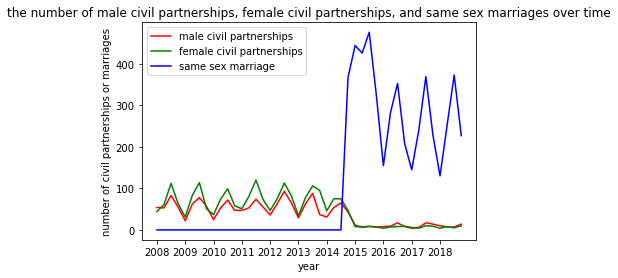

In [30]:
quarters = np.arange(44) * 0.25 + 2008
years = np.arange(11) + 2008
plt.plot(quarters, male_civil, 'r', label= "male civil partnerships")
plt.plot(quarters, female_civil, 'g', label= "female civil partnerships")
plt.plot(quarters, same_sex_marriage, 'b', label= "same sex marriage")
plt.legend(loc='best')
plt.xlabel('year') # Set x axis label
plt.ylabel('number of civil partnerships or marriages') # Set y axis label
plt.title('the number of male civil partnerships, female civil partnerships, and same sex marriages over time')
plt.xticks(np.arange(11) + 2008, years) # Set labels for x axis ticks, extra challenge
plt.show()

## Saving Figures

The function used to save the current figure is `plt.savefig`. This function accepts a string representing a file path, which tells Python where the image should be saved. In specifying an extension, the `plt.savefig` method will infer which format to export to. We can additionally control the resolution with the `dpi` parameter, which stands for dots-per-inch.

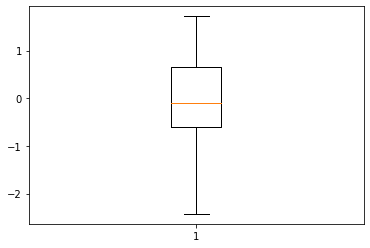

In [31]:
data = np.random.randn(100) # Generate some random data
plt.boxplot(data) # Create a boxplot of that data
plt.savefig("my_boxplot.png", dpi=300) # Save the figure as a png, with high resolution.
plt.show()

## Figure Objects

As we have seen, we build plots in matplotlib by successive calls to `plt`. We start by calling an artist method, which draws a figure. Then if we call other artist methods, these draw on the same figure. Calling methods such as `plt.xlabel` or `plt.title` update the current figure too, which we can save using `plt.savefig`. To see the current figure, we can call `plt.show`.

In the background, matplotlib always maintains a "current figure", which is empty to start with. Successive calls to functions from the `plt` module draw on or change the current figure. This allows us to build up a figure piece-by-piece: layering different plots on the same figure, and updating the figure's annotations and other settings one-by-one. But then we need to know: how do we clear the current figure to create something new? It turns out, this is done automatically every time we call `plt.show`.

### Exercise 3
Take a look at the file `my_graph.jpeg` produced by running this code block. Something is wrong: change the code block so that the output file is the same as the displayed graph.

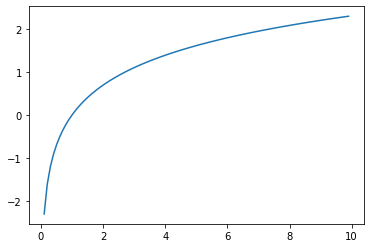

In [33]:
x = np.arange(0.1, 10, 0.1)
plt.plot(x, np.log(x))
plt.savefig("my_graph.jpeg") # need to run this first
plt.show()

The current figure is also cleared when we run a new Jupyter cell. This means we must complete a figure in a single cell, and we then have a "blank canvas" in every new cell. This is something to be aware of if you try to migrate code from a Jupyter notebook to a regular python script: in the background, Jupyter will have been clearing the current figure for you, so you may need to add code to clear the current figure manually. Here's an example showing how Jupyter clears figures automatically:

In [34]:
x = np.arange(0, 6, 0.1)

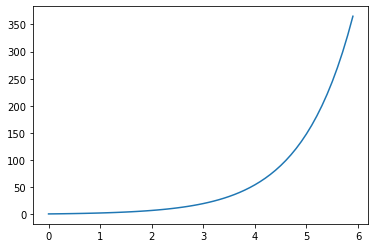

In [35]:
plt.plot(x, np.exp(x))

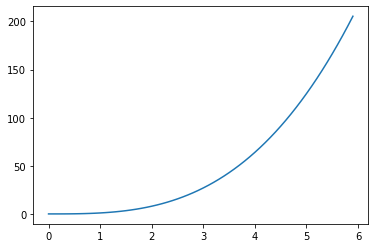

In [36]:
plt.plot(x, x**3)

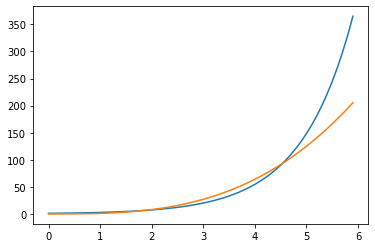

In [37]:
plt.plot(x, np.exp(x))
plt.plot(x, x**3)

It's good practice to end the creation of a new plot with `plt.show`, so that if code is transferred to a non-Jupyter environment we will not have uncleared figures interfering with each other. You can also use `plt.clf` to clear the current figure (this may be preferable, since in a regular python script, `plt.show` creates a pop-up window displaying the figure, and the rest of the script will not execute until this window has been closed).

We've seen that by default, matplotlib builds up a figure by updating an object called the "current figure". But can we also access other, previously created figures to update them? We can even create more complicated figures which may contain several sub-plots side by side. This involves creating and referencing figure objects, and axes objects. This is not much harder than we've been doing already, but since it goes a little beyond the basic matplotlib functionality, it will not be covered here.

Another way to enhance our plotting capabilities is through the [seaborn](https://seaborn.pydata.org/) package. Matplotlib, with its style of building up plots in a piecewise manner, gives us lots of control over our visuals - but it can also be tedious to use, especially for routine tasks. Seaborn is based on matplotlib, but wraps up lots of convenient functionality in an easy to use way. Its visual style is also a little different to matplotlib. It is closely related to another package known as Pandas, which will be introduced in Notebook 4.